In [1]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px

from visualisations.plot_snippet_loss import extract_model_outputs
from dcase2020.config import mongo_connection_string
from dcase2020.secret_config import mongo_password

import ipywidgets as widgets

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt



In [36]:
mongo_db_uri = mongo_connection_string.format(mongo_password)
data = extract_model_outputs(mongo_db_uri, "dcase2020_task2_flows_grid", run_id = 394)
data = extract_model_outputs(mongo_db_uri, "dcase2020_task2_baseline", run_id = 351)
data = extract_model_outputs(mongo_db_uri, "dcase2020_task2_flows_maf", run_id = 43)

In [37]:
data

{'dev/ToyCar/test_id_01_2020-05-15 03:51:31.542009_43': <dcase2020.evaluation_results.EvaluationResults at 0x1b0a48fbdc8>,
 'dev/ToyCar/test_id_02_2020-05-15 03:51:42.357667_43': <dcase2020.evaluation_results.EvaluationResults at 0x1b0a436d888>,
 'dev/ToyCar/test_id_03_2020-05-15 03:51:53.141599_43': <dcase2020.evaluation_results.EvaluationResults at 0x1b0a2bac1c8>,
 'dev/ToyCar/test_id_04_2020-05-15 03:52:03.912992_43': <dcase2020.evaluation_results.EvaluationResults at 0x1b0a2b212c8>,
 'dev/ToyConveyor/test_id_01_2020-05-15 03:52:14.697149_43': <dcase2020.evaluation_results.EvaluationResults at 0x1b0a28ebdc8>,
 'dev/ToyConveyor/test_id_02_2020-05-15 03:52:35.760163_43': <dcase2020.evaluation_results.EvaluationResults at 0x1b0a2bac088>,
 'dev/ToyConveyor/test_id_03_2020-05-15 03:52:56.069345_43': <dcase2020.evaluation_results.EvaluationResults at 0x1b0a436d5c8>,
 'dev/fan/test_id_00_2020-05-15 03:53:16.334646_43': <dcase2020.evaluation_results.EvaluationResults at 0x1b0a2f5e0c8>,
 'de

In [4]:
plot = widgets.Output()

def plot_data(experiment, idx_range):
    plot.clear_output()
    
    with plot:
        # display(data[change.new].snippets)
        df = data[experiment].snippets
        df = pd.melt(df, id_vars=['ID'])
        # df = df[df['ID']=='anomaly_id_01_00000000.wav']
        # df = df[df['ID'].str.contains('anomaly')]

        elem_per_page = 20
        max_y = max(df['value'])
            
        df = df[df['ID'].isin(np.unique(df['ID'].tolist())[((idx_range*elem_per_page)-elem_per_page):(idx_range*elem_per_page)])]

        # fig = px.line(df, x="variable", y="value", color='ID',  facet_row="ID",height=1500)
        # display()
        #display(fig.show())
        
        # sns.set(style="whitegrid")
        
        # fig_dims = (5, 15)
        # fig, ax = plt.subplots(figsize=fig_dims)
        plt.figure(figsize=(10, 30))
        # sns.set(rc={'figure.figsize':(30,30)})
        g = sns.FacetGrid(df, col="ID", col_wrap=4)
        g = g.map(plt.plot, "variable", "value", marker=".")
        g.set(ylim=(0, max_y))
        display(plt.show())

dropdown_expertiment = widgets.Dropdown(options = data.keys())
dropdown_page = widgets.Dropdown(options = list(range(1,40)))
        
def dropdown_exp_eventhandler(change):
    plot_data(change.new, dropdown_page.value)
    
def dropdown_page_eventhandler(change):
    plot_data(dropdown_expertiment.value, change.new)
    
        
dropdown_expertiment.observe(dropdown_exp_eventhandler, names='value')
dropdown_page.observe(dropdown_page_eventhandler, names='value')

print('Experiment')
display(dropdown_expertiment)
print('Page: ')
display(dropdown_page)
print('Plot:')
display(plot)


Experiment


Dropdown(options=('dev/ToyCar/test_id_01_2020-06-10 05:56:10.696777_394', 'dev/ToyCar/test_id_02_2020-06-10 05…

Page: 


Dropdown(options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 2…

Plot:


Output()

In [5]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [7]:

df = data['dev/valve/test_id_02_2020-06-10 06:54:47.958497_394'].snippets
df = df.melt(id_vars=['ID'])

agg = df.groupby(["ID"]).describe().reset_index()

agg.columns = agg.columns = [' '.join(col).strip() for col in agg.columns.values]

agg = agg.melt(id_vars=['ID'])

agg["Class"] = [el.split("_")[0] for el in agg["ID"]]
agg = agg.groupby(["Class"]).describe()

agg



value                                                             \
         count        mean         std        min         25%         50%   
Class                                                                       
anomaly  960.0  289.222286  144.007903  24.030915  218.663940  334.763429   
normal   800.0  270.376599  133.333131  15.548878  221.848831  326.887925   

                                 
                75%         max  
Class                            
anomaly  361.847733  562.444702  
normal   349.370225  554.963196

In [38]:

from sklearn.metrics import roc_auc_score

columns = ['machine', 'metric', 'value']
results = pd.DataFrame(columns=columns)

for k in data.keys():

    print(k)    
    results = results.append(data[k].get_all_metrics(k))


dev/ToyCar/test_id_01_2020-05-15 03:51:31.542009_43
dev/ToyCar/test_id_02_2020-05-15 03:51:42.357667_43
dev/ToyCar/test_id_03_2020-05-15 03:51:53.141599_43
dev/ToyCar/test_id_04_2020-05-15 03:52:03.912992_43
dev/ToyConveyor/test_id_01_2020-05-15 03:52:14.697149_43
dev/ToyConveyor/test_id_02_2020-05-15 03:52:35.760163_43
dev/ToyConveyor/test_id_03_2020-05-15 03:52:56.069345_43
dev/fan/test_id_00_2020-05-15 03:53:16.334646_43
dev/fan/test_id_02_2020-05-15 03:53:25.297352_43
dev/fan/test_id_04_2020-05-15 03:53:33.479606_43
dev/fan/test_id_06_2020-05-15 03:53:41.458897_43
dev/pump/test_id_00_2020-05-15 03:53:50.089183_43
dev/pump/test_id_02_2020-05-15 03:53:54.621557_43
dev/pump/test_id_04_2020-05-15 03:53:58.589873_43
dev/pump/test_id_06_2020-05-15 03:54:02.273616_43
dev/slider/test_id_00_2020-05-15 03:54:06.115210_43
dev/slider/test_id_02_2020-05-15 03:54:14.993427_43
dev/slider/test_id_04_2020-05-15 03:54:22.133191_43
dev/slider/test_id_06_2020-05-15 03:54:27.287691_43
dev/valve/test_id

In [9]:
results

,machine,metric,value,machine_type_id,machine_type,machine_id,rocauc,p_rocauc
0,dev/ToyCar/test_id_01_2020-06-10 05:56:10.6967...,25%,NaN,dev/ToyCar/test_id_01,dev/ToyCar/test,id_01,0.806158,0.656471
0,dev/ToyCar/test_id_01_2020-06-10 05:56:10.6967...,50%,NaN,dev/ToyCar/test_id_01,dev/ToyCar/test,id_01,0.814372,0.666211
0,dev/ToyCar/test_id_01_2020-06-10 05:56:10.6967...,75%,NaN,dev/ToyCar/test_id_01,dev/ToyCar/test,id_01,0.794437,0.660800
0,dev/ToyCar/test_id_01_2020-06-10 05:56:10.6967...,max,NaN,dev/ToyCar/test_id_01,dev/ToyCar/test,id_01,0.563528,0.500399
0,dev/ToyCar/test_id_01_2020-06-10 05:56:10.6967...,mean,NaN,dev/ToyCar/test_id_01,dev/ToyCar/test,id_01,0.804675,0.662622
0,dev/ToyCar/test_id_01_2020-06-10 05:56:10.6967...,min,NaN,dev/ToyCar/test_id_01,dev/ToyCar/test,id_01,0.723452,0.622978
0,dev/ToyCar/test_id_01_2020-06-10 05:56:10.6967...,std,NaN,dev/ToyCar/test_id_01,dev/ToyCar/test,id_01,0.537229,0.510196
0,dev/ToyCar/test_id_02_2020-06-10 05:59:42.7906...,25%,NaN,dev/ToyCar/test_id_02,dev/ToyCar/test,id_02,0.850911,0.734203
0,dev/ToyCar/test_id_02_2020-06-10 05:59:42.7906...,50%,NaN,dev/ToyCar/test_id_02,dev/ToyCar/test,id_02,0.847795,0.715421
0,dev/ToyCar/test_id_02_2020-06-10 05:59:42.7906...,75%,NaN,dev/ToyCar/test_id_02,dev/ToyCar/test,id_02,0.833229,0.696978


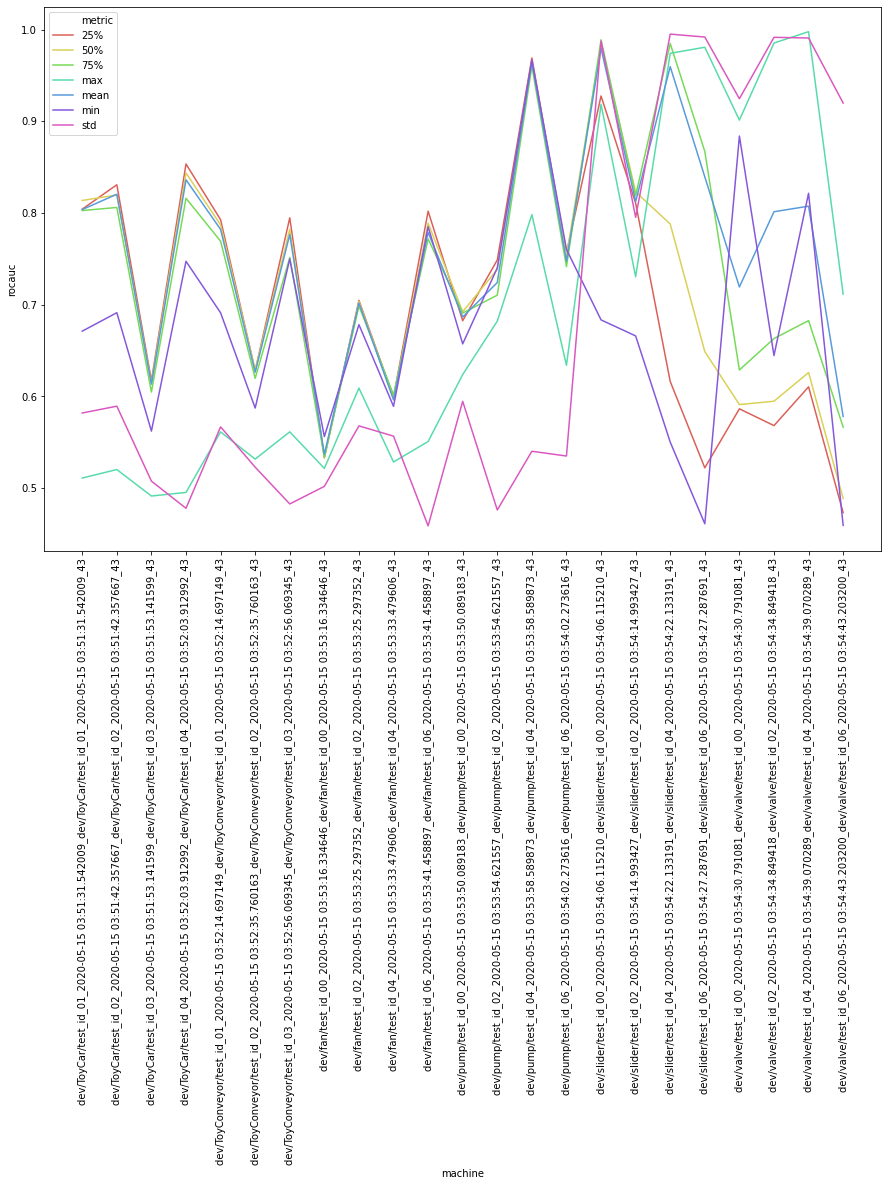

In [41]:
plt.figure(figsize=(15,10))
with sns.color_palette("hls", 7):
    g = sns.lineplot(x="machine", y="rocauc", hue="metric",data=results)
plt.xticks(rotation=90)

plt.show()

In [25]:
results_grouped = results.groupby(['machine_type', 'metric']).mean()
results_grouped

rocauc  p_rocauc
machine_type         metric                    
dev/ToyCar/test      25%     0.794938  0.665430
                     50%     0.793774  0.656899
                     75%     0.771480  0.635033
                     max     0.542909  0.503132
                     mean    0.790053  0.649306
                     min     0.727081  0.627904
                     std     0.488100  0.501595
dev/ToyConveyor/test 25%     0.729436  0.612156
                     50%     0.722928  0.600849
                     75%     0.700978  0.586372
                     max     0.563764  0.520057
                     mean    0.719227  0.597983
                     min     0.683429  0.594726
                     std     0.489197  0.497295
dev/fan/test         25%     0.739711  0.608659
                     50%     0.738518  0.607599
                     75%     0.728784  0.599059
                     max     0.661462  0.549801
                     mean    0.735076  0.605546
                     min     0.728698  0.607700
                     std     0.552587  0.514935
dev/pump/test        25%     0.788753  0.672940
                     50%     0.782505  0.676624
                     75%     0.773526  0.672734
                     max     0.733415  0.646118
                     mean    0.779393  0.675032
                     min     0.780165  0.680530
                     std     0.561791  0.551040
dev/slider/test      25%     0.740115  0.632885
                     50%     0.825845  0.680157
                     75%     0.914881  0.779790
                     max     0.910283  0.753142
                     mean    0.890066  0.707027
                     min     0.632420  0.525022
                     std     0.920360  0.857148
dev/valve/test       25%     0.579673  0.510181
                     50%     0.603715  0.513146
                     75%     0.692479  0.526640
                     max     0.874780  0.691379
                     mean    0.726444  0.529726
                     min     0.619585  0.511418
                     std     0.938744  0.803321

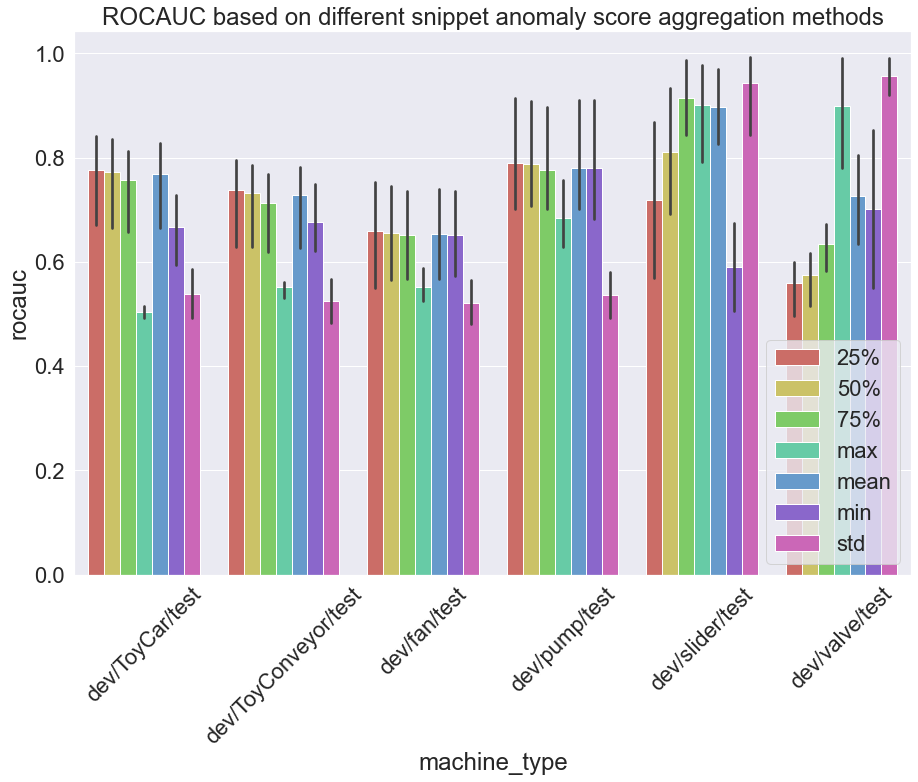

In [48]:

plt.figure(figsize=(15,10))
sns.set(font_scale=2)

with sns.color_palette("hls", 7):
    g = sns.barplot(x="machine_type", y="rocauc", hue="metric",data=results)
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.title('ROCAUC based on different snippet anomaly score aggregation methods')
plt.show()



In [ ]:
df = data['dev/ToyCar/test_id_01_2020-05-13 11:04:29.470755'].snippets
df = pd.melt(df, id_vars=['ID'])
# df = df[df['ID']=='anomaly_id_01_00000000.wav']
# df = df[df['ID'].str.contains('anomaly')]

df = df[df['ID'].isin(np.unique(df['ID'].tolist())[1:10])]

fig = px.line(df, x="variable", y="value", color='ID',  facet_row="ID")
fig.show()